## Multi-ML models to predict Hotel Booking Status

In [1]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt 
from matplotlib.pyplot import figure
import warnings
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
df = pd.read_csv("..//Downloads/Hotel_reservations.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## Data preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df.shape

(36275, 19)

In [7]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [9]:
df.no_of_special_requests.unique()

array([0, 1, 3, 2, 4, 5], dtype=int64)

In [10]:
#After checking the original data,the data set quality is good and there is no missing values.
#However,type_of_meal_plan, room_type_reserved, market_segment_type, booking_status, need to be numerically processed.

In [11]:
df.room_type_reserved.unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [12]:
df.type_of_meal_plan.unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [13]:
df.market_segment_type.unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [14]:
df.booking_status.unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [15]:
df.replace("Not_Canceled", 1, inplace = True)
df.replace("Canceled", 0, inplace = True)
need_dummy_col = ["room_type_reserved",
                 "type_of_meal_plan",
                 "market_segment_type"]
df_num = pd.get_dummies(df, columns = need_dummy_col)

In [16]:
df_num

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 7,type_of_meal_plan_Meal Plan 1,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN00001,2,0,1,2,0,224,2017,10,2,...,0,1,0,0,0,0,0,0,1,0
1,INN00002,2,0,2,3,0,5,2018,11,6,...,0,0,0,0,1,0,0,0,0,1
2,INN00003,1,0,2,1,0,1,2018,2,28,...,0,1,0,0,0,0,0,0,0,1
3,INN00004,2,0,0,2,0,211,2018,5,20,...,0,1,0,0,0,0,0,0,0,1
4,INN00005,2,0,1,1,0,48,2018,4,11,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,0,85,2018,8,3,...,0,1,0,0,0,0,0,0,0,1
36271,INN36272,2,0,1,3,0,228,2018,10,17,...,0,1,0,0,0,0,0,0,0,1
36272,INN36273,2,0,2,6,0,148,2018,7,1,...,0,1,0,0,0,0,0,0,0,1
36273,INN36274,2,0,0,3,0,63,2018,4,21,...,0,0,0,0,1,0,0,0,0,1


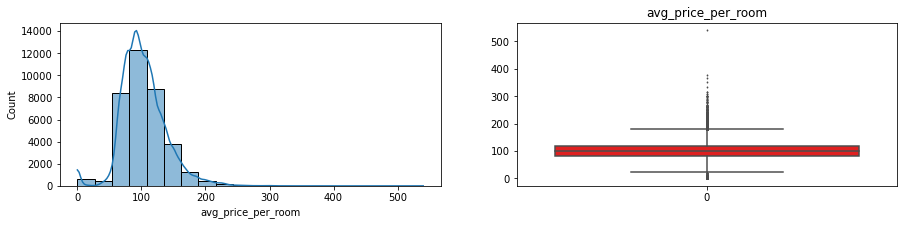

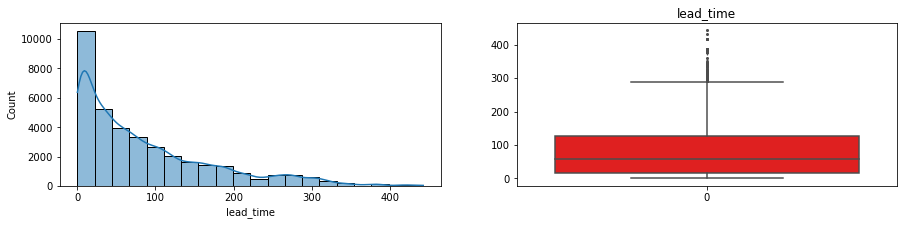

In [17]:
factors = ["avg_price_per_room", "lead_time"]
# each subgraph is one row and two columns
for i in factors:
    fig, axis = plt.subplots(1, 2, figsize =(15,3))
    plt.title(i)
    sns.histplot(data = df_num[i], bins = 20, kde = True, ax=axis[0]);
    sns.boxplot(data = df_num[i], ax= axis[1], color = "red", fliersize =1);

## Temporal eigenfactor engineering 

In [18]:
df_num["arrival_month"] = df_num["arrival_month"].apply(lambda x:str(x) if x>9 else "0" + str(x))
df_num["arrival_date"] = df_num["arrival_date"].apply(lambda x:str(x) if x>9 else "0" +str(x))
df_num["arrival_year"] = df_num["arrival_year"].astype("string", copy = False)
df_num["date"] = df_num["arrival_year"] + '-' + df_num["arrival_month"] + '-' + df_num["arrival_date"]

df_num.drop("arrival_year", axis = 1, inplace=True)
df_num.drop("arrival_month", axis = 1, inplace=True)
df_num.drop("arrival_date", axis = 1, inplace=True)

def generate_time_features(data):
    data = data.copy()
    date_format =  pd.to_datetime(data.date, errors = "coerce")
    data["month"] = date_format.dt.month
    
    data["dayofweek"] = date_format.dt.dayofweek
    #Seasons :Winter :Spring :Summer: Fall
    data["season"] = np.where(data.month.isin([12, 1,2]), 0, 1)
    data["season"] = np.where(data.month.isin([6, 7, 8]), 2, data["season"])
    data["season"] = np.where(data.month.isin([9, 10, 11]), 3, data["season"])
    return data

new_df = generate_time_features(df_num)
new_df.drop("date", axis= 1, inplace=True)
new_df.drop("Booking_ID", axis=1, inplace=True)

new_df.dropna(axis=0, how="any", inplace = True)

## Factor Correlation analysis

Text(0.5, 1.0, 'Factors Rank')

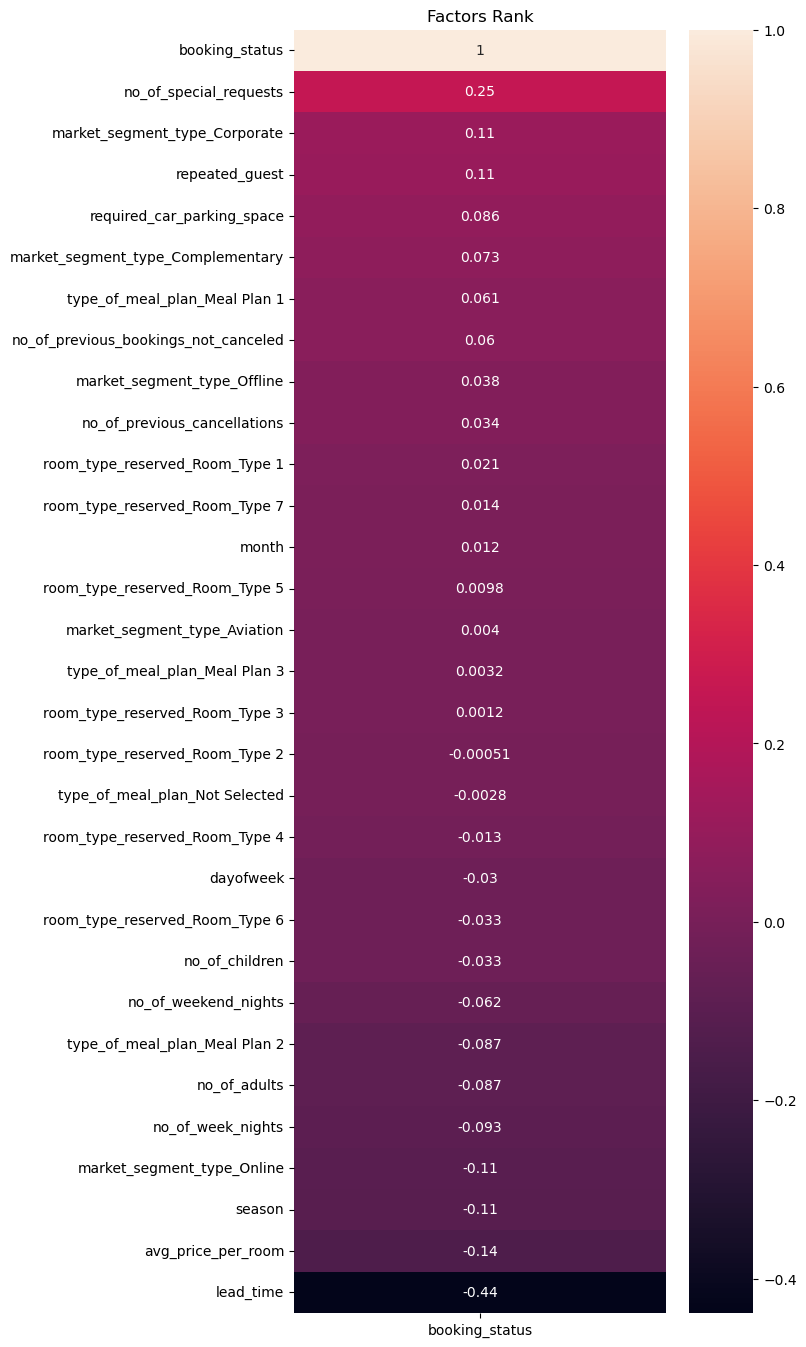

In [19]:
figure(figsize=(6, 17), dpi=100)
sns.heatmap(new_df.corr()[["booking_status"]].sort_values(by ="booking_status", ascending=False),annot = True)
plt.title("Factors Rank")

## Comprehensive modelling

In [20]:
#this paper uses traditional logistic regression model and two machine learning models: KNN and XGBoost

In [21]:
y = new_df["booking_status"];
X = new_df.drop("booking_status", axis = 1)

X_train, X_valid, y_train, y_valid = train_test_split(X,y, stratify=y, train_size=0.8, test_size =0.2, random_state=0)


classifiers = {
    "LogisticRegression" : LogisticRegression(random_state=0, penalty="l1", solver="liblinear"),
    "KNN" : KNeighborsClassifier(),
    "XGBoost": XGBClassifier(random_state=0, use_label_encoder = False, eval_metric ="logloss"),
}

LR_grid = {"penalty": ["l1", "l2"],
          "C" : [0.25, 0.5, 0.75, 1, 1.25, 1.5],
          "max_iter" : [50, 100, 150]}

KNN_grid = {"n_neighbors" : [3, 5, 7, 9], "p" : [1, 2]}

boosted_grid = {"n_estimators" : [50, 100, 150, 200],
               "max_depth" : [4, 8, 12],
               "learning_rate": [0.05, 0.1, 0.15]}

grid = {
    "LogisticRegression":LR_grid,
    "KNN" : KNN_grid,
    "XGBoost": boosted_grid,
}

C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
i=0
model_best_params = classifiers.copy()
valid_scores = pd.DataFrame({
    "Classifier" :classifiers.keys(),
    "Validation accuracy" : np.zeros(len(classifiers)),
    "Training time" : np.zeros(len(classifiers))
})

for key, classifier in classifiers.items():
    start =time.time()
    model = GridSearchCV(estimator = classifier,
                        param_grid=grid[key],
                        n_jobs = -1,
                        cv=None)
    model.fit(X_train, y_train)
    scores=model.score(X_valid, y_valid)
    valid_scores.iloc[i, 1] = scores
    print("Model:", key)
    print("Scores:", scores)
    
    model_best_params[key] = model.best_params_
    
    stop = time.time()
    valid_scores.iloc[i, 2] = np.round((stop -start)/ 60, 2)
    i+=1
    
valid_scores